In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
dataframe1 = pd.read_csv("./all_courses.csv")
dataframe1

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
0,Data Engineering with AWS,nanodegree,"Learn to design data models, build data wareho...",intermediate,4 Months,4.6,1802.0,"AWS Glue, Amazon S3, AWS Data Warehouse, Re...","Intermediate Python, intermediate SQL & comman...",NaN,https://www.udacity.com/course/data-engineer-n...
1,Product Manager,nanodegree,Envision and execute the development of indust...,beginner,4 Months,4.7,864.0,"Product Strategy, Product Design, Product Deve...",No Experience Required,NaN,https://www.udacity.com/course/product-manager...
2,C++,nanodegree,Get hands-on experience building five real-wor...,intermediate,4 Months,4.5,1126.0,"Data Structures & Algorithms, Memory Managemen...",Intermediate Programming,NaN,https://www.udacity.com/course/c-plus-plus-nan...
3,Business Analytics,nanodegree,Gain foundational data skills like analyzing d...,beginner,3 Months,4.8,2649.0,"Excel & Spreadsheets, SQL, Data Visualization,...",NaN,Mode,https://www.udacity.com/course/business-analyt...
4,Data Scientist,nanodegree,"Build effective machine learning models, run d...",advanced,4 Months,4.7,1212.0,"Machine Learning, Deep Learning, Software Engi...","Python, SQL & Statistics","Bertelsmann, Figure Eight, IBM Watson, Insight...",https://www.udacity.com/course/data-scientist-...
...,...,...,...,...,...,...,...,...,...,...,...
262,Front-End Interview Prep,free,Answer front-end technical and behavioral inte...,intermediate,1 Week,NaN,NaN,"Interview questions, Common FE Questions, Whit...",NaN,NaN,https://www.udacity.com/course/front-end-inter...
263,Full-Stack Interview Prep,free,Answer common full stack and web security inte...,intermediate,1 Week,NaN,NaN,"Interview practice, Common FS Questions, White...",NaN,NaN,https://www.udacity.com/course/full-stack-inte...
264,Data Structures & Algorithms in Swift,free,Review and practice the skills technical inter...,intermediate,4 Weeks,NaN,NaN,"Interview practice, Swift, Data structures, Ca...",NaN,NaN,https://www.udacity.com/course/data-structures...
265,iOS Interview Prep,free,Answer iOS and mobile development interview qu...,intermediate,1 Week,NaN,NaN,"Interview practice, Common iOS Questions, Whit...",NaN,NaN,https://www.udacity.com/course/ios-interview-p...


In [4]:
dataframe1.dtypes

Title              object
Type               object
Description        object
Level              object
Duration           object
Rating            float64
Review Count      float64
Skills Covered     object
Prerequisites      object
Affiliates         object
URL                object
dtype: object

In [5]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           267 non-null    object 
 1   Type            267 non-null    object 
 2   Description     261 non-null    object 
 3   Level           265 non-null    object 
 4   Duration        263 non-null    object 
 5   Rating          62 non-null     float64
 6   Review Count    62 non-null     float64
 7   Skills Covered  267 non-null    object 
 8   Prerequisites   77 non-null     object 
 9   Affiliates      138 non-null    object 
 10  URL             267 non-null    object 
dtypes: float64(2), object(9)
memory usage: 23.1+ KB


In [6]:
dataframe1['Rating'].unique()

array([4.6, 4.7, 4.5, 4.8, nan, 4.3, 4.4])

In [7]:
dataframe1['Review Count'].unique()

array([1802.,  864., 1126., 2649., 1212., 3865., 2418., 3496., 3368.,
       1558.,  749.,  143.,  339.,  115.,  789., 1269.,   nan, 1032.,
        359., 1626.,  220.,  144.,   50., 1194.,  566.,  534.,  798.,
        850.,  571.,  616.,  355.,  846.,  122.,  256.,  525.,  806.,
         89.,  163.,  242.,  844.,  529.,  301.,  554.,  161.,  151.,
        446.,  277.,  124.,  145.,  897.,  254.,  206.,   94.,  200.,
         83.,   57.,  106.,   65.,   95.])

<Axes: xlabel='Rating', ylabel='Review Count'>

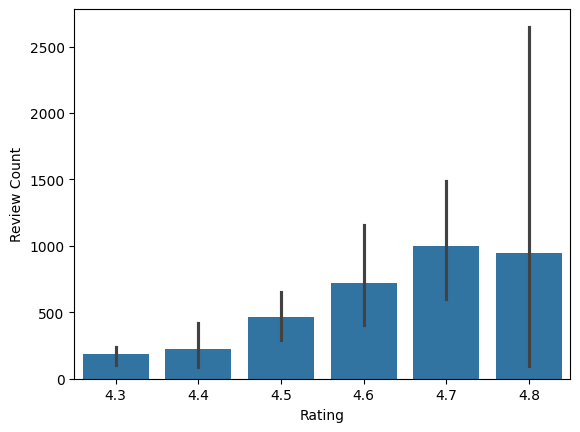

In [8]:
sns.barplot(x = dataframe1['Rating'] , y = dataframe1['Review Count'] )

<Axes: >

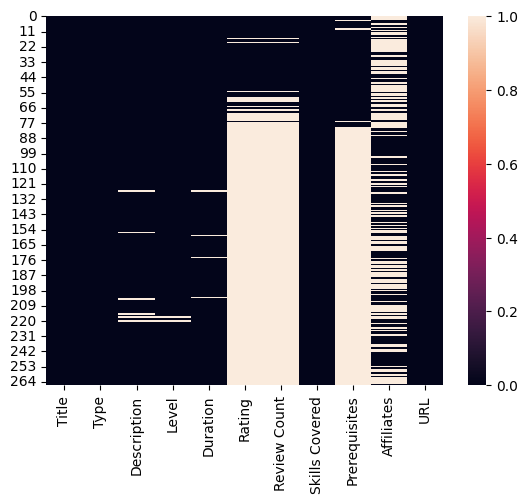

In [9]:
sns.heatmap(dataframe1.isna()  , linecolor="red")
# sns.barplot(dataframe1.isna())

In [10]:
dataframe1.loc[dataframe1['Rating'].isna()]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
16,Self-Driving Car Engineer,nanodegree,Learn the techniques that power self-driving c...,advanced,5 Months,NaN,NaN,"Computer Vision, Deep Learning, Sensor Fusion,...","Python, C++, Linear Algebra and Calculus","Waymo, Mercedes-Benz",https://www.udacity.com/course/self-driving-ca...
19,Data Engineering with Microsoft Azure,nanodegree,Master job-ready Azure skills like designing d...,intermediate,4 Months,NaN,NaN,"Database Normalization, Data Modeling Basics,...","Experience with SQL, Python, Azure, and Github",NaN,https://www.udacity.com/course/data-engineerin...
54,Digital Project Management,nanodegree,Build confidence translating business requirem...,beginner,1 Month,NaN,NaN,"Waterfall project management, Strategic commu...",Professional fluency in English,NaN,https://www.udacity.com/course/digital-project...
59,Ethical Hacker,nanodegree,"Learn how to find and exploit vulnerabilities,...",advanced,2 Months,NaN,NaN,"Vulnerability Management, Penetration Testing...","Linux, Networking, Programming and Window OS",NaN,https://www.udacity.com/course/ethical-hacker-...
60,RPA Developer with UiPath,nanodegree,Build the operational processes that enable th...,beginner,4 Months,NaN,NaN,"Process Automation, Business Operations, UiPat...",Basic familiarity with Microsoft applications ...,UiPath,https://www.udacity.com/course/rpa-developer-n...
...,...,...,...,...,...,...,...,...,...,...,...
262,Front-End Interview Prep,free,Answer front-end technical and behavioral inte...,intermediate,1 Week,NaN,NaN,"Interview questions, Common FE Questions, Whit...",NaN,NaN,https://www.udacity.com/course/front-end-inter...
263,Full-Stack Interview Prep,free,Answer common full stack and web security inte...,intermediate,1 Week,NaN,NaN,"Interview practice, Common FS Questions, White...",NaN,NaN,https://www.udacity.com/course/full-stack-inte...
264,Data Structures & Algorithms in Swift,free,Review and practice the skills technical inter...,intermediate,4 Weeks,NaN,NaN,"Interview practice, Swift, Data structures, Ca...",NaN,NaN,https://www.udacity.com/course/data-structures...
265,iOS Interview Prep,free,Answer iOS and mobile development interview qu...,intermediate,1 Week,NaN,NaN,"Interview practice, Common iOS Questions, Whit...",NaN,NaN,https://www.udacity.com/course/ios-interview-p...


In [11]:
a = dataframe1["Skills Covered"].unique()
count = 0;
for i in a:
    count += 1
print(count)

249


In [12]:
dataframe1.describe()

,Rating,Review Count
count,62.000000,62.000000
mean,4.595161,714.887097
std,0.123378,856.714006
min,4.300000,50.000000
25%,4.500000,151.000000
50%,4.600000,359.000000
75%,4.700000,849.000000
max,4.800000,3865.000000


In [13]:
dataframe1.columns

Index(['Title', 'Type', 'Description', 'Level', 'Duration', 'Rating',
       'Review Count', 'Skills Covered', 'Prerequisites', 'Affiliates', 'URL'],
      dtype='object')

In [14]:
dataframe1.isna().sum()

Title               0
Type                0
Description         6
Level               2
Duration            4
Rating            205
Review Count      205
Skills Covered      0
Prerequisites     190
Affiliates        129
URL                 0
dtype: int64

In [15]:
dataframe1.loc[dataframe1.duplicated()]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL


In [16]:
dataframe1.loc[dataframe1.duplicated(subset='Title')]

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
87,Artificial Intelligence,free,This course gives a survey of topics in AI alo...,intermediate,4 Months,NaN,NaN,"Artificial Intelligence, Probability, Bayesian...",NaN,Georgia Institute of Technology,https://www.udacity.com/course/artificial-inte...


In [17]:
dataframe1.query('Title == "Artificial Intelligence"')

,Title,Type,Description,Level,Duration,Rating,Review Count,Skills Covered,Prerequisites,Affiliates,URL
53,Artificial Intelligence,nanodegree,Learn essential Artificial Intelligence concep...,advanced,3 Months,4.5,355.0,"Constraint Propagation, AI Algorithms, Const...","Algebra, Calculus, Statistics, & Python",NaN,https://www.udacity.com/course/ai-artificial-i...
87,Artificial Intelligence,free,This course gives a survey of topics in AI alo...,intermediate,4 Months,NaN,NaN,"Artificial Intelligence, Probability, Bayesian...",NaN,Georgia Institute of Technology,https://www.udacity.com/course/artificial-inte...


In [23]:
# new_df = dataframe1.copy()
new_df = dataframe1.drop(columns=["Rating" ,"Review Count","Prerequisites" , "Affiliates" , "Type" , "Description" , "Duration" , "URL"]).copy()

## Analysis Conclusion 

- Most of the columns/features are well formated.
- Duplicate Values are Not Present except one value of Title Column -> Artificial Inteligence
- Prerequisites Column has the independent Null Values so cannot be managed thus dropping it.
- No requirement of Rating and Review Count and Affiliates, thus dropping it as well

In [24]:
new_df

,Title,Level,Skills Covered
0,Data Engineering with AWS,intermediate,"AWS Glue, Amazon S3, AWS Data Warehouse, Re..."
1,Product Manager,beginner,"Product Strategy, Product Design, Product Deve..."
2,C++,intermediate,"Data Structures & Algorithms, Memory Managemen..."
3,Business Analytics,beginner,"Excel & Spreadsheets, SQL, Data Visualization,..."
4,Data Scientist,advanced,"Machine Learning, Deep Learning, Software Engi..."
...,...,...,...
262,Front-End Interview Prep,intermediate,"Interview questions, Common FE Questions, Whit..."
263,Full-Stack Interview Prep,intermediate,"Interview practice, Common FS Questions, White..."
264,Data Structures & Algorithms in Swift,intermediate,"Interview practice, Swift, Data structures, Ca..."
265,iOS Interview Prep,intermediate,"Interview practice, Common iOS Questions, Whit..."


In [20]:
new_df["Level"]

0      intermediate
1          beginner
2      intermediate
3          beginner
4          advanced
           ...     
262    intermediate
263    intermediate
264    intermediate
265    intermediate
266    intermediate
Name: Level, Length: 267, dtype: object

In [25]:
new_df.isna().sum()

Title             0
Level             2
Skills Covered    0
dtype: int64

In [26]:
new_df.dtypes

Title             object
Level             object
Skills Covered    object
dtype: object

In [48]:
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(new_df["Skills Covered"])

In [34]:
print(vectorizer.vocabulary_)

{'aws': 79, 'glue': 363, 'amazon': 27, 's3': 759, 'data': 209, 'warehouse': 955, 'redshift': 716, 'apache': 42, 'airflow': 20, 'pipeline': 632, 'dags': 207, 'extraction': 313, 'creation': 190, 'etl': 299, 'olap': 585, 'cubes': 197, 'architecture': 51, 'cloud': 144, 'computing': 166, 'fluency': 332, 'maintenance': 502, 'product': 673, 'strategy': 846, 'design': 234, 'development': 239, 'sprint': 824, 'launch': 470, 'structures': 851, 'algorithms': 24, 'memory': 525, 'management': 505, 'concurrency': 168, 'object': 576, 'oriented': 603, 'programming': 677, 'excel': 304, 'spreadsheets': 822, 'sql': 826, 'visualization': 947, 'dashboards': 208, 'machine': 500, 'learning': 474, 'deep': 222, 'software': 813, 'engineering': 288, 'front': 343, 'end': 285, 'basics': 89, 'html': 392, 'css': 195, 'python': 689, 'syntax': 861, 'text': 884, 'processing': 669, 'in': 408, 'devtools': 242, 'command': 153, 'line': 482, 'interface': 432, 'code': 148, 'debugging': 220, 'basic': 88, 'javascript': 447, 'sc

In [44]:
print(matrix.shape)

(267, 978)
